# Задание

In [169]:
# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 
# 2. постройте гистограмму
# 3. реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.
# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.
# 5. реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.
# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.
# Для каждого решения - напечатайте результат

# 1. Загрузите изображение в оттенках серого sar_1_gray.jpg. 

In [170]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

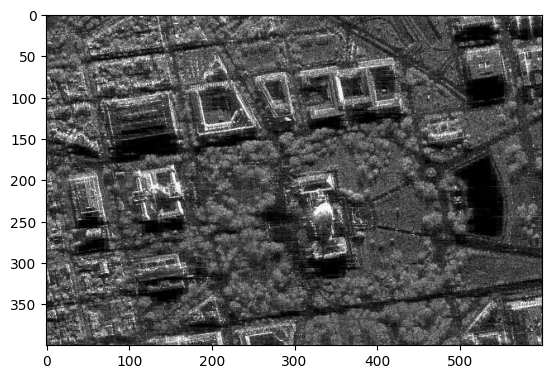

In [171]:
image_gray = cv2.imread('sar_1_gray.jpg', cv2.IMREAD_GRAYSCALE)
plt.imshow(image_gray, cmap='gray')
plt.show()

# 2. Постройте гистограмму

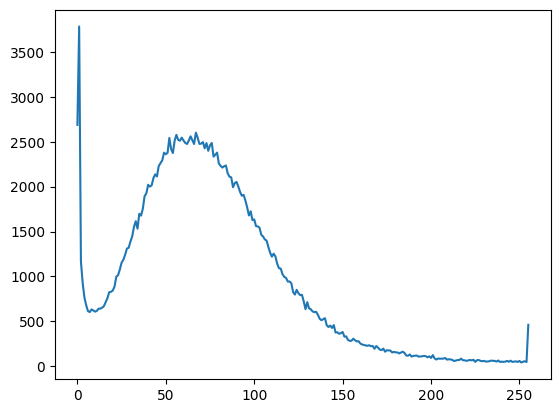

In [172]:
histSize = 256
histRange = (0, 256)
accumulate = False

b_hist = cv2.calcHist([image_gray], [0], None, [histSize], histRange, accumulate=accumulate)
plt.plot(b_hist)
plt.show()

# 3. Реализуйте алгоритм гамма коррекции с параметром гамма <1, >1.

In [173]:
def gamma_correction(image, gamma):
    normalized = image / 255.0
    corrected = np.power(normalized, gamma)
    result = np.uint8(corrected * 255)
    return result

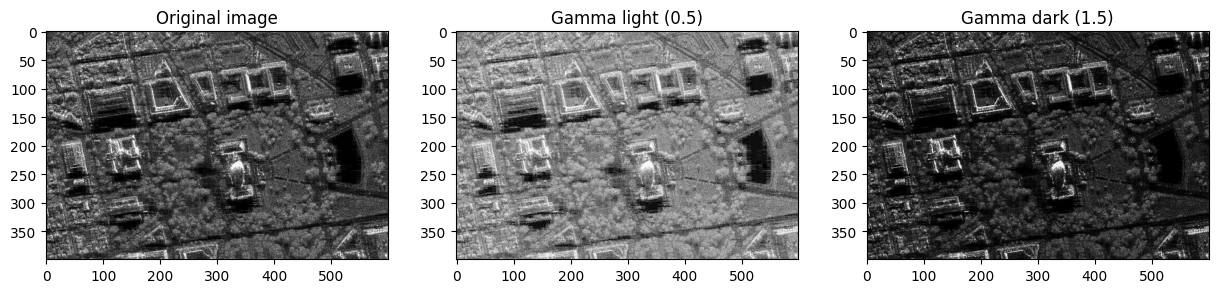

In [174]:
# Gamma light
gamma_light = 0.5
image_gamma_light = gamma_correction(image_gray, 0.5)

# Gamma dark
gamma_dark = 1.5
image_gamma_dark = gamma_correction(image_gray, gamma_dark)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title('Original image')

axs[1].imshow(image_gamma_light, cmap='gray')
axs[1].set_title(f'Gamma light ({gamma_light})')

axs[2].imshow(image_gamma_dark, cmap='gray')
axs[2].set_title(f'Gamma dark ({gamma_dark})')

plt.show()

# 4. Сравните исходное изображение, скорректированное при помощи гамма-фильтра. MSE, SSIM.

In [175]:
from skimage.metrics import structural_similarity, mean_squared_error

Original vs Gamma light (0.5)
	SSIM: 0.7875008686792753
	MSE: 3250.429145833333

Original vs Gamma dark (1.5)
	SSIM: 0.8065788107754002
	MSE: 971.8206541666667


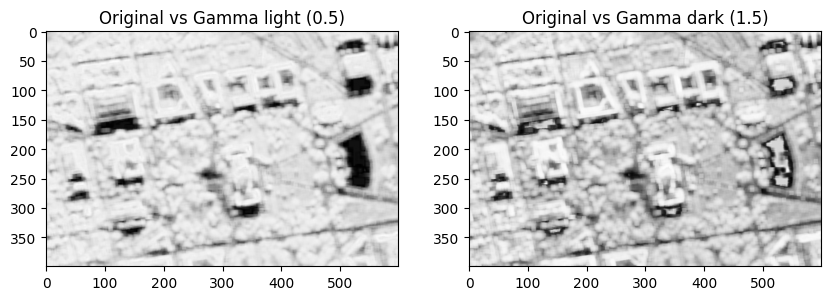

In [176]:
# Original image vs Gamma light image
(ssim_light, diff_light) = structural_similarity(image_gray, image_gamma_light, full=True)
diff_light = (diff_light * 255).astype("uint8")
print("Original vs Gamma light (0.5)")
print(f"\tSSIM: {ssim_light}")
print(f"\tMSE: {mean_squared_error(image_gray, image_gamma_light)}")

print()

# Original image vs Gamma dark image
(ssim_dark, diff_dark) = structural_similarity(image_gray, image_gamma_dark, full=True)
diff_dark = (diff_dark * 255).astype("uint8")
print("Original vs Gamma dark (1.5)")
print(f"\tSSIM: {ssim_dark}")
print(f"\tMSE: {mean_squared_error(image_gray, image_gamma_dark)}")

# Show images
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(diff_light, cmap='gray')
axs[0].set_title('Original vs Gamma light (0.5)')

axs[1].imshow(diff_dark, cmap='gray')
axs[1].set_title('Original vs Gamma dark (1.5)')

plt.show()

# 5. Реализуйте алгоритм статистической цветокоррекции на основе статистики eq_gray.

In [177]:
def statistical_color_correction(image, reference):
    mean_src, std_src = image.mean(), image.std()
    mean_ref, std_ref, = reference.mean(), reference.std()

    corrected = (image - mean_src) * (std_ref / std_src) + mean_ref
    corrected = np.clip(corrected, 0, 255).astype(np.uint8)
    return corrected

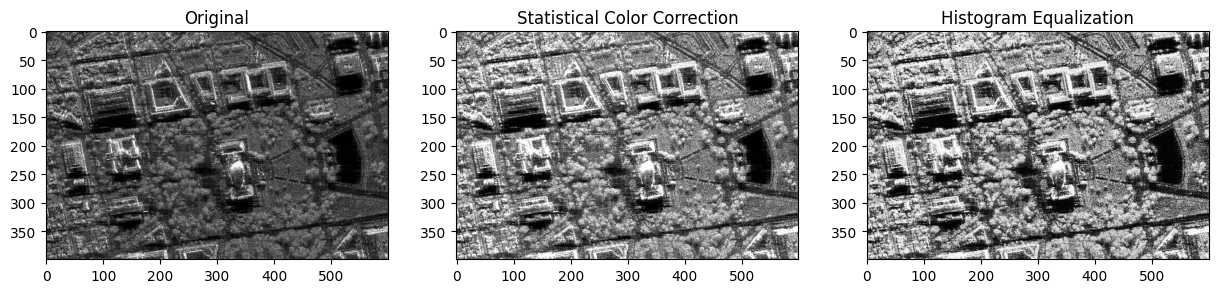

In [178]:
eq_gray = cv2.equalizeHist(image_gray)
image_corrected = statistical_color_correction(image_gray, eq_gray)

# Show images
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(image_gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(image_corrected, cmap='gray')
axs[1].set_title('Statistical Color Correction')

axs[2].imshow(eq_gray, cmap='gray')
axs[2].set_title('Histogram Equalization')

plt.show()

Histogram Equalization vs Statistical Color Correction
	SSIM: 0.9500070636130857
	MSE: 247.70102083333333


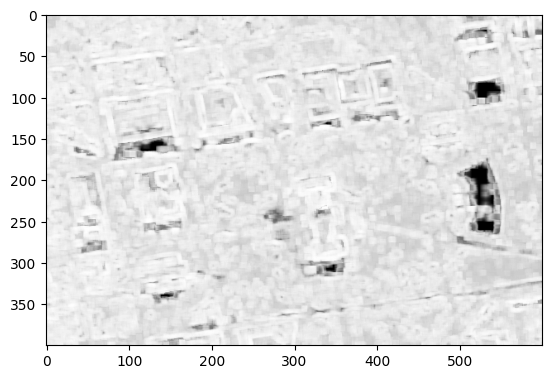

In [179]:
# Histogram Equalization vs Statistical Color Correction
(ssim, diff) = structural_similarity(image_corrected, eq_gray, full=True)
diff = (diff * 255).astype("uint8")
print("Histogram Equalization vs Statistical Color Correction")
print(f"\tSSIM: {ssim}")
print(f"\tMSE: {mean_squared_error(image_corrected, eq_gray)}")

# Show images
plt.imshow(diff, cmap="gray")

# 6. Протестируйте работу алгоритмов пороговой фильтрации с различными параметрами.

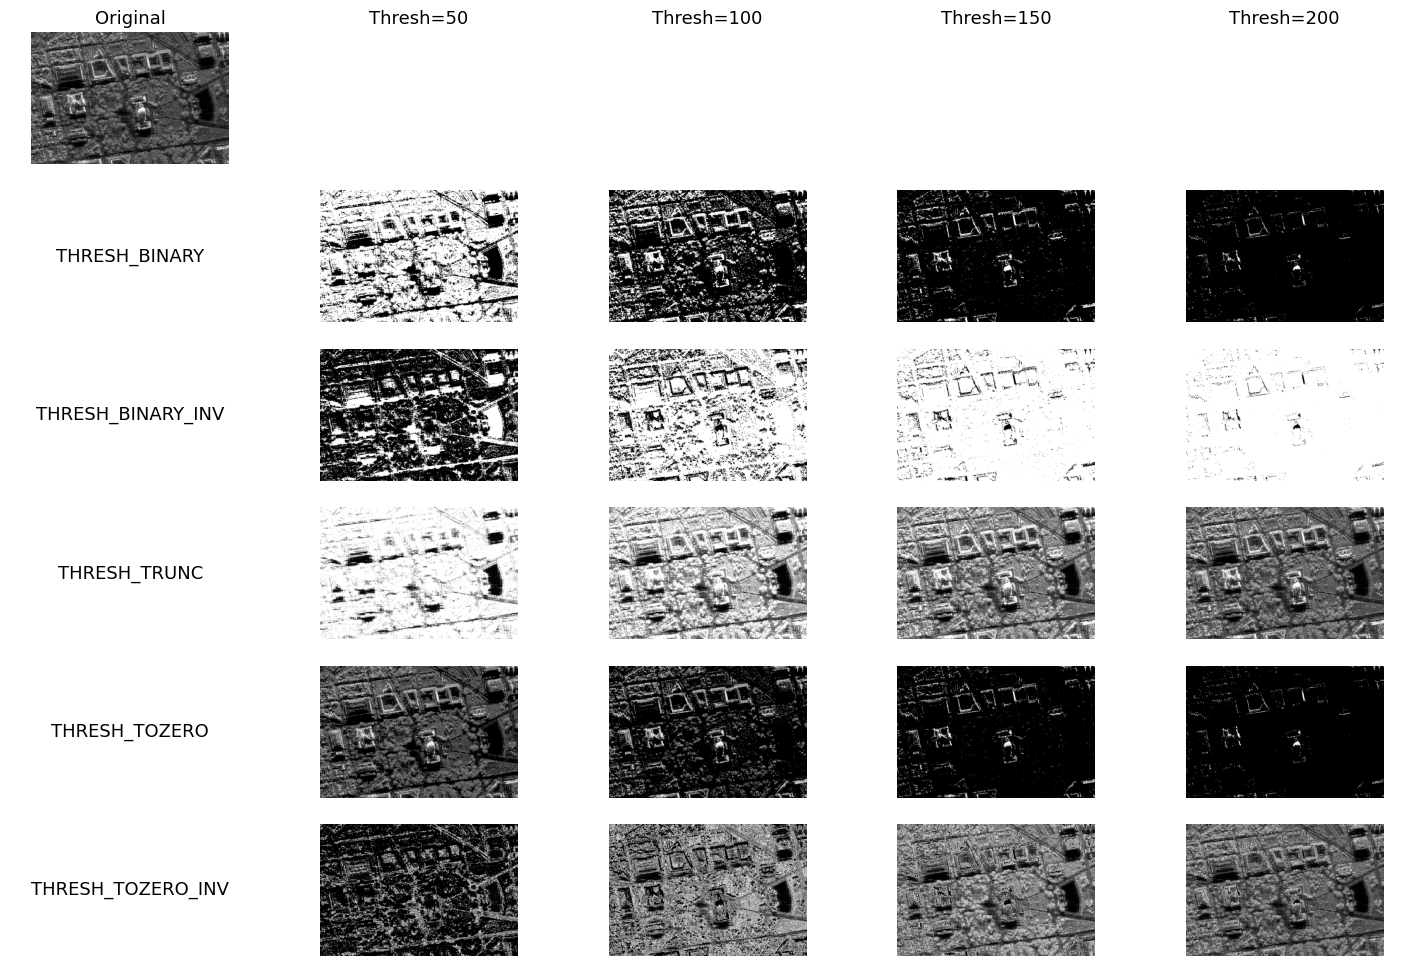

In [180]:
thresholds = [50, 100, 150, 200]
methods = [
    ('THRESH_BINARY',       cv2.THRESH_BINARY),
    ('THRESH_BINARY_INV',   cv2.THRESH_BINARY_INV),
    ('THRESH_TRUNC',        cv2.THRESH_TRUNC),
    ('THRESH_TOZERO',       cv2.THRESH_TOZERO),
    ('THRESH_TOZERO_INV',   cv2.THRESH_TOZERO_INV)
]

fig, axs = plt.subplots(len(methods)+1, len(thresholds)+1, figsize=(18, 12))

# Fill first row
for j, thresh in enumerate(thresholds):
    axs[0, j+1].set_title(f'Thresh={thresh}', fontsize=13)
    axs[0, j+1].axis('off')

# Fill first column
for i, (method_name, _) in enumerate(methods):
    axs[i+1, 0].text(0.5, 0.5, method_name, fontsize=13, ha='center', va='center')
    axs[i+1, 0].axis('off')

# Show images
for i, (method_name, method) in enumerate(methods):
    for j, thresh in enumerate(thresholds):
        _, img_thresh = cv2.threshold(image_gray, thresh, 255, method)
        axs[i+1, j+1].imshow(img_thresh, cmap='gray')
        axs[i+1, j+1].axis('off')

axs[0, 0].imshow(image_gray, cmap='gray')
axs[0, 0].set_title('Original', fontsize=13)
axs[0, 0].axis('off')

plt.show()